# Цель работы: 
Применить библиотеки  sсikit-learn и mglearn  для построения моделей классификации и  регрессии. Изучить полученные данные, научиться оценивать качество моделей

## Задача:
Загрузить и вернуть набор данных физических упражнений.
Построить модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов

In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

In [61]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print("Ключи linnerud: \n{}".format(linnerud.keys()))

print("Форма массива data для набора linnerud: {}".format(linnerud.data.shape))

print("Количество примеров в наборе данных о физических упражнениях: {}".format(len(linnerud.target)))

print("Имена признаков:\п{}".format(linnerud.feature_names))

Ключи linnerud: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])
Форма массива data для набора linnerud: (20, 3)
Количество примеров в наборе данных о физических упражнениях: 20
Имена признаков:\п['Chins', 'Situps', 'Jumps']


In [62]:
print("Ответы: \n{}".format(linnerud['target']))

Ответы: 
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


In [63]:
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|


## Модель регрессии KNeighborsRegressor

R^2 на тестовом наборе: -0.37


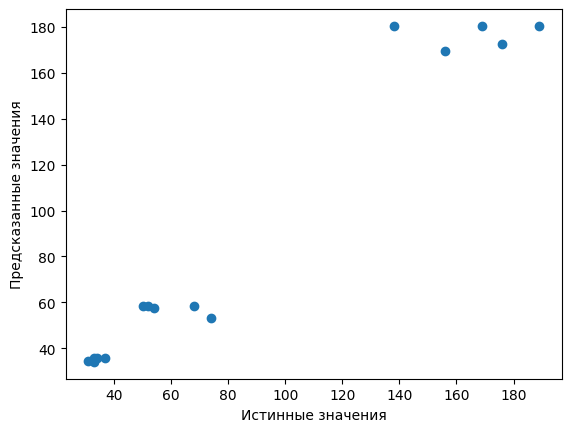

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(linnerud.data, linnerud.target, random_state=0)

# Создание и обучение модели KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=4)  # Примерное количество соседей
regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = regressor.predict(X_test)

# Вывод результата
print("R^2 на тестовом наборе: {:.2f}".format(regressor.score(X_test, y_test)))

# Визуализация прогнозов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()



Для улучшения производительности модели рассмотрели следующие шаги:

* Изменение параметров модели
* Предобработка данных

In [65]:
knn_regressor = KNeighborsRegressor(n_neighbors=4)

knn_regressor.fit(X_train, y_train)
print("R^2 на Тестовом наборе (измененные параметры): {:.2f}".format(knn_regressor.score(X_test, y_test)))

R^2 на Тестовом наборе (измененные параметры): -0.37


In [66]:
from sklearn.preprocessing import StandardScaler

# Стандартизируйте данные перед обучением модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создайте и обучите модель на стандартизированных данных
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train_scaled, y_train)
print("R^2 на Тестовом наборе (стандартизированные данные): {:.2f}".format(knn_regressor.score(X_test_scaled, y_test)))


R^2 на Тестовом наборе (стандартизированные данные): -0.82


Это указывает на то, что модель плохо соответствует данным и прогнозирует хуже, чем просто среднее значение целевой переменной. Вероятно, проблема не только в параметрах модели, но и в данных.

## Модель регрессии LinearRegression

Коэффициент детерминации R^2 на тестовом наборе: -1.24


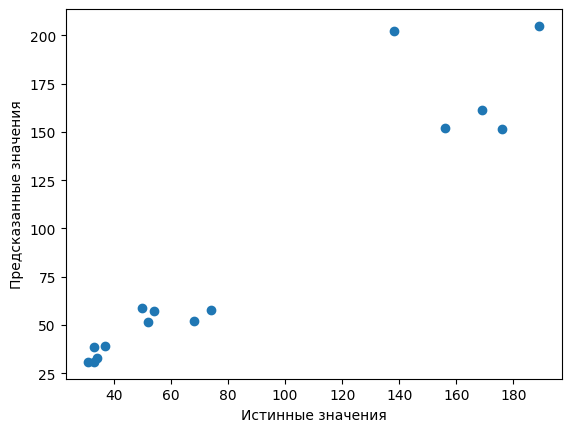

In [67]:
# Создание и обучение модели LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = linear_regressor.predict(X_test)

# Оценка производительности модели
r_squared = linear_regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()


Коэффициент детерминации R 2 на тестовом наборе, равный -1.24, указывает на то, что модель LinearRegression плохо справляется с объяснением изменчивости в данных "load_linnerud". В данном контексте отрицательное значение R^2 говорит о том, что модель не только не объясняет изменчивость, но также плохо соответствует данным

## Гребная регрессия(Ridge)

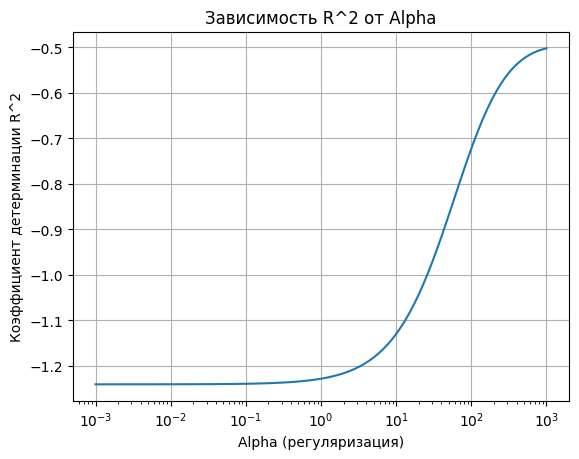

In [68]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3, 3, 100)  # Создание 100 значений alpha в логарифмической шкале

# Создание пустых списков для хранения коэффициентов детерминации R^2
r_squared_values = []

# Перебор различных значений alpha
for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    r_squared = ridge_regressor.score(X_test, y_test)
    r_squared_values.append(r_squared)

# Визуализация зависимости R^2 от alpha
plt.semilogx(alphas, r_squared_values)
plt.xlabel("Alpha (регуляризация)")
plt.ylabel("Коэффициент детерминации R^2")
plt.title("Зависимость R^2 от Alpha")
plt.grid(True)
plt.show()

Исходя из этого графика мы решили задать Alpha 1000

Коэффициент детерминации R^2 на тестовом наборе: -0.50


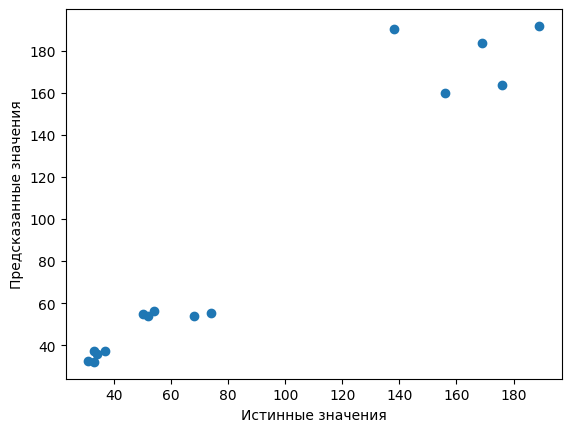

In [69]:
ridge_regressor = Ridge(alpha=1000)  # alpha - параметр регуляризации
ridge_regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = ridge_regressor.predict(X_test)

# Оценка производительности модели
r_squared = ridge_regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()


В данном случае значение R^2 = 0.38 говорит о том, что модель Ridge улучшила производительность по сравнению с исходной линейной регрессией. Но также плохо справляется

## Модель регрессии Лассо

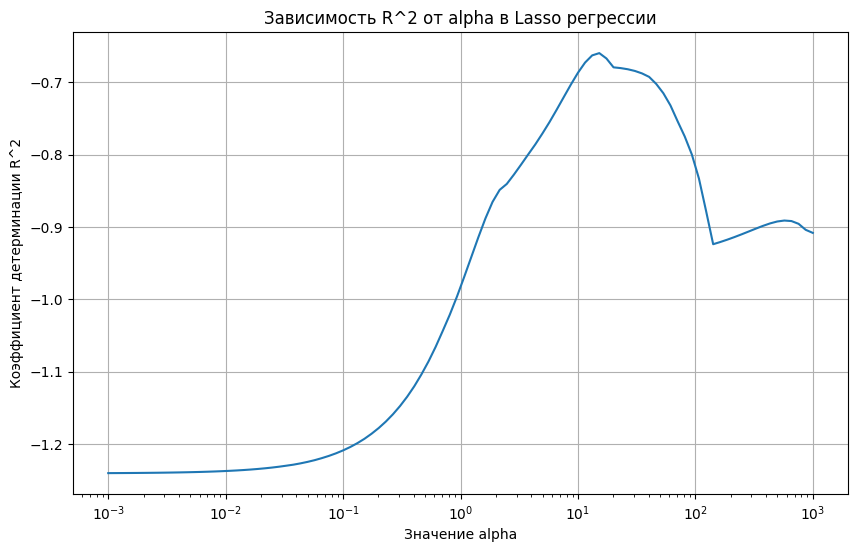

In [70]:
from sklearn.linear_model import Lasso

# Задаем различные значения alpha для тестирования
alphas = np.logspace(-3, 3, 100) 

# Инициализация списков для сохранения результатов
r_squared_values = []

# Перебор разных значений alpha
for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    r_squared = lasso_regressor.score(X_test, y_test)
    r_squared_values.append(r_squared)

# Построение графика
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r_squared_values)
plt.xlabel("Значение alpha")
plt.ylabel("Коэффициент детерминации R^2")
plt.title("Зависимость R^2 от alpha в Lasso регрессии")
plt.grid()
plt.show()


Коэффициент детерминации R^2 на тестовом наборе: -0.66


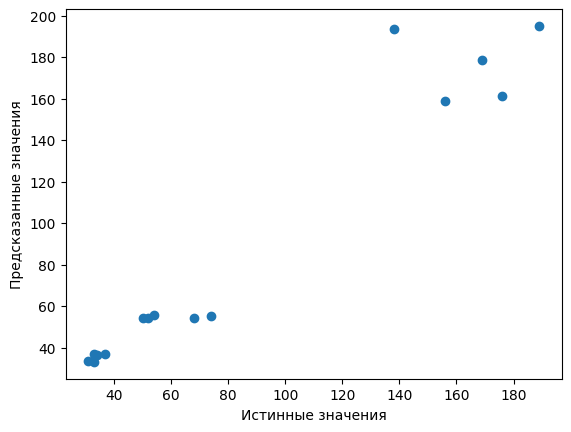

In [71]:
from sklearn.linear_model import Lasso

# Создание и обучение модели регрессии Lasso
lasso_regressor = Lasso(alpha=13)  # alpha - параметр регуляризации
lasso_regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = lasso_regressor.predict(X_test)

# Оценка производительности модели
r_squared = lasso_regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()

## Построение модели LogisticRegression

D:\Users\Bekbol2\PycharmProjects\jupyter\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Users\Bekbol2\PycharmProjects\jupyter\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


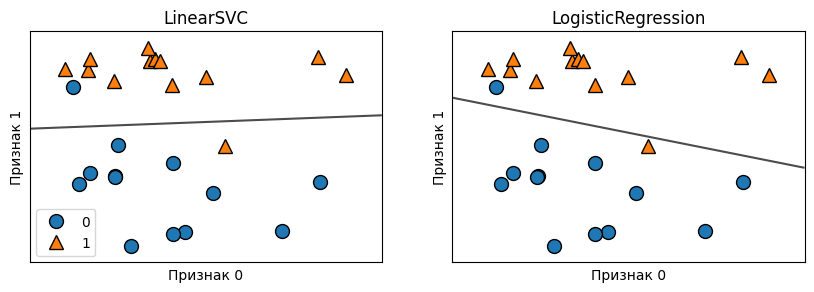

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))


for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter (X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

In [73]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud ()
X_train, X_test, y_train, y_test = train_test_split(
    linnerud.data, linnerud.target, stratify = linnerud.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score (X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score (X_test, y_test)))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Набор данных "load_linnerud" не является набором данных для задачи классификации, а представляет собой данные о физических упражнениях и регрессионной задачи. Поэтому построение линейных моделей для классификации на этом наборе данных не является соответствующим

# Сравнение результатов:

KNeighborsRegressor:
* Коэффициент детерминации R^2 на тестовом наборе: -0.37

LinearRegression:
* Коэффициент детерминации R^2 на тестовом наборе: -1.24

Ridge Regression:
* Коэффициент детерминации R^2 на тестовом наборе: -0.5

Lasso Regression:
* Коэффициент детерминации R^2 на тестовом наборе: -0.66

Эти результаты показывают, что KNeighborsRegressor достигает наилучшей производительности среди 4x моделей на данном наборе данных.

# Вывод:

Мы проверили на 4 моделях и можем сделать вывод что выбор модели зависит от целей задачи и особенностей данных, и что не все данные подходт под эти модели и наоборот.